#Introduction

Tire selection plays a key role in ensuring road safety, especially in extreme weather conditions. The type of tires used on your vehicle depends on the season and weather conditions. Summer tires offer excellent traction in hot, dry conditions, while winter tires offer better traction in cold, ice, and snow. All-season tires are designed to perform well in both summer and winter. 
 
The aim of this project is to develop a model for identifying the tire type, which distinguishes between summer, winter and all-season tires in particular. The data set used to train and test the model will contain images of tires with different tire wear patterns. 
 
 The development of an accurate tire type recognition model could make a significant contribution to road safety by providing drivers with an automated means of ensuring they are using the correct tires for  current weather conditions. This project aims to harness the power of deep learning to create an efficient and effective tire type recognition system.

## Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Opony_Computer_Vision

In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import  random
import os
from io import BytesIO
from PIL import Image
import cv2
import numpy as np

from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img

from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
from ipywidgets import interact
import ipywidgets as widgets

## Scraping test

In [ ]:
summer = '1'
winter = '2'
both = '3'
page = '1'


url = f'https://www.24opony.pl/szukaj.html?f=1&idproducent=0&idsezon={summer}&idrozmiar=0&idpojazd=1&czyxl=0&czyrf=0&inpre=0&cod=0&cdo=0&strona={page}&idmodel=0'

content = requests.get(url).content
soup = BeautifulSoup(content, 'html.parser')

In [ ]:
images = ['https://www.24opony.pl' + image.find('img')['src'] for image in soup.find_all('a', {'rel':'prettyPhoto'})]

In [ ]:
images[0].split('/')[-1].split('.')[0]

'n_4164_s'

In [ ]:
images

In [ ]:
content = requests.get(images[0]).content

In [ ]:
img  = Image.open(BytesIO(content))

In [ ]:
img.max()

## Scraping

In [ ]:
def get_page(season, page_number):
  url = f'https://www.24opony.pl/szukaj.html?f=1&idproducent=0&idsezon={season}&idrozmiar=0&idpojazd=1&czyxl=0&czyrf=0&inpre=0&cod=0&cdo=0&strona={page_number}&idmodel=0'
  try:
    response = requests.get(url)
    content = response.content
    soup = BeautifulSoup(content, 'html.parser')
    time.sleep(0.5)
    return content
  except Exception as e:
    print(f'Error: {e}')

def get_urls(content):
  soup = BeautifulSoup(content, 'html.parser')
  return set(['https://www.24opony.pl' + image.find('img')['src'] for image in soup.find_all('a', {'rel':'prettyPhoto'}) if not image.find('img')['src'].split('/')[-1].split('.')[0].startswith('brak_zdjecia')])


def sharpen_image(func):
  def wrapper(url):
    img = func(url)
    new_img = cv2.filter2D(img, -1, kernel=np.array([[0, -1, 0],
                                                [-1, 5, -1],
                                                [0, -1, 0]]))
    return new_img
  return wrapper
    
@sharpen_image
def get_image(url):
  try:
    content = requests.get(url).content
    img = Image.open(BytesIO(content))
    img = np.array(img)
    return img
  except Exception as e:
    print(f'Error: {e}')

def save_image(img, url,season, path):
  file_name = url.split('/')[-1].split('.')[0] + '.jpg'
  os.makedirs(f'{path}/{season}', exist_ok=True)
  cv2.imwrite(f'{path}/{season}/{file_name}', img)

def get_data(season, start_page, end_page, path):
  for page_number in range(start_page, end_page):
    content = get_page(season, page_number + 1)
    urls = get_urls(content)

    for i, url in enumerate(urls):
      img = get_image(url)      
      save_image(img, url, season, path)
      time.sleep(1.0/100)
      if  i % 5 == 0:
        print(f'Download {i} images from page {page_number}/{end_page}')



In [ ]:
#dodaj lsitę z linkami, tak że gdy się link powtarza to skipuje

get_data(1, 1, 400, 'data/train')
get_data(2, 1, 400, 'data/train')
get_data(3, 1, 400, 'data/train')

In [ ]:
def get_page(season, page_number):
  url = f'https://www.24opony.pl/szukaj.html?f=1&idproducent=0&idsezon={season}&idrozmiar=0&idpojazd=1&czyxl=0&czyrf=0&inpre=0&cod=0&cdo=0&strona={page_number}&idmodel=0'
  try:
    response = requests.get(url)
    content = response.content
    soup = BeautifulSoup(content, 'html.parser')
    time.sleep(0.5)
    return content
  except Exception as e:
    print(f'Error: {e}')

def get_urls(content):
  soup = BeautifulSoup(content, 'html.parser')
  return set(['https://www.24opony.pl' + image['href'] for image in soup.find_all('a', {'rel':'prettyPhoto'}) if not image['href'].split('/')[-1].split('.')[0].startswith('brak_zdjecia')])


def sharpen_image(func):
  def wrapper(url):
    img = func(url)
    new_img = cv2.filter2D(img, -1, kernel=np.array([[0, -1, 0],
                                                [-1, 5, -1],
                                                [0, -1, 0]]))
    return new_img
  return wrapper
    
@sharpen_image
def get_image(url):
  try:
    content = requests.get(url).content
    img = Image.open(BytesIO(content))
    img = np.array(img)
    return img
  except Exception as e:
    print(f'Error: {e}')

def save_image(img, url,season, path):
  file_name = url.split('/')[-1].split('.')[0] + '.jpg'
  os.makedirs(f'{path}/{season}', exist_ok=True)
  cv2.imwrite(f'{path}/{season}/{file_name}', img)

def get_data(season, start_page, end_page, path):
  for page_number in range(start_page, end_page):
    content = get_page(season, page_number + 1)
    urls = get_urls(content)

    for i, url in enumerate(urls):
      img = get_image(url)      
      save_image(img, url, season, path)
      time.sleep(1.0/100)
      if  i % 5 == 0:
        print(f'Download {i} images from page {page_number}/{end_page}')


In [ ]:
get_data(1, 1, 400, 'data/train_various_sizes')
get_data(2, 1, 400, 'data/train_various_sizes')
get_data(3, 1, 400, 'data/train_various_sizes')

#Model

## First model

The model is based on thumbnail photos in which the tread is barely visible. The images have been sharpened.

In [ ]:
test_size = 0.2
path = 'data'

# for sub_type in ['1', '2', '3']:
#   os.makedirs(path + '/test' +f'/{sub_type}', exist_ok=True)
#   file_list = os.listdir(path + '/train/' + sub_type)
#   number_of_samples = int(len(file_list) * test_size)

#   for file_name in random.sample(file_list, number_of_samples):
#     os.rename(path +'/train/' + sub_type + '/' + file_name,
#               path +'/test/' + sub_type + '/' + file_name)

# train_path = 'data/train'
# test_path = 'data/test'
# print(len(os.listdir(train_path + '/1')))
# print(len(os.listdir(test_path + '/1')))

In [ ]:
data_path = 'data/train'

batch_size = 128
img_heights = 128
img_width = 128



In [ ]:
train_ds = keras.utils.image_dataset_from_directory(data_path,
                                                    validation_split=0.2,
                                                    subset='training',
                                                    image_size = (img_heights, img_width),
                                                    batch_size = batch_size,
                                                    label_mode='categorical',
                                                    interpolation='bilinear',
                                                    seed=42)

val_ds = keras.utils.image_dataset_from_directory(data_path,
                                                    validation_split=0.2,
                                                    subset='validation',
                                                    image_size = (img_heights, img_width),
                                                    batch_size = batch_size,
                                                    label_mode='categorical',
                                                  interpolation='bilinear',
                                                  seed=42)

Found 1146 files belonging to 3 classes.
Using 917 files for training.
Found 1146 files belonging to 3 classes.
Using 229 files for validation.


In [ ]:
for img, label in train_ds:
  print(img.shape)
  print(label.shape)

(128, 128, 128, 3)
(128, 3)
(128, 128, 128, 3)
(128, 3)
(128, 128, 128, 3)
(128, 3)
(128, 128, 128, 3)
(128, 3)
(128, 128, 128, 3)
(128, 3)
(128, 128, 128, 3)
(128, 3)
(128, 128, 128, 3)
(128, 3)
(21, 128, 128, 3)
(21, 3)


In [ ]:
model = Sequential()

model.add(layers.Rescaling(1/255)) # przez to, z wczytujemy batchami trzeba ustandaryzować używajać warstwy Rescaling
model.add(layers.Conv2D(32,
                        (3, 3),
                        padding='same',
                        activation='relu',
                        input_shape=(img_width, img_heights, 3)))

model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(16,
                        (3, 3),
                        padding='same',
                        activation='relu'
                        ))

model.add(layers.MaxPool2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(128,
                       activation='relu'))

model.add(layers.Dense(3,
                       activation='softmax'))

In [ ]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=10,
                    batch_size=128)

Epoch 1/10
8/8 [==============================] - 295s 8s/step - loss: 2.6057 - accuracy: 0.4471 - val_loss: 1.2066 - val_accuracy: 0.3188
Epoch 2/10
8/8 [==============================] - 2s 95ms/step - loss: 1.1318 - accuracy: 0.3740 - val_loss: 1.0805 - val_accuracy: 0.4716
Epoch 3/10
8/8 [==============================] - 2s 82ms/step - loss: 1.0602 - accuracy: 0.5398 - val_loss: 1.0608 - val_accuracy: 0.4716
Epoch 4/10
8/8 [==============================] - 2s 84ms/step - loss: 1.0052 - accuracy: 0.5398 - val_loss: 1.1031 - val_accuracy: 0.4716
Epoch 5/10
8/8 [==============================] - 2s 82ms/step - loss: 0.9893 - accuracy: 0.5398 - val_loss: 1.0454 - val_accuracy: 0.4716
Epoch 6/10
8/8 [==============================] - 2s 81ms/step - loss: 0.9873 - accuracy: 0.5398 - val_loss: 1.0453 - val_accuracy: 0.4716
Epoch 7/10
8/8 [==============================] - 2s 117ms/step - loss: 0.9774 - accuracy: 0.5398 - val_loss: 1.0670 - val_accuracy: 0.4716
Epoch 8/10
8/8 [==========

## Second model

A model to evaluate the impact of image quality on model efficiency. Images resolution and dimensions are higher.

### First set

The same conditions as for the previous model. An improvement in the model's efficiency can be seen, which means that the quality of the photo, and in particular the tread outlines clearly, affect the detection of the right type of tires.

In [ ]:
# test_size = 0.2
# path = 'data'

# for sub_type in ['1', '2', '3']:
#   os.makedirs(path + '/test_various_sizes' +f'/{sub_type}', exist_ok=True)
#   file_list = os.listdir(path + '/train_various_sizes/' + sub_type)
#   number_of_samples = int(len(file_list) * test_size)

#   for file_name in random.sample(file_list, number_of_samples):
#     os.rename(path +'/train_various_sizes/' + sub_type + '/' + file_name,
#               path +'/test_various_sizes/' + sub_type + '/' + file_name)

# train_path = 'data/train_various_sizes'
# test_path = 'data/test_various_sizes'
# print(len(os.listdir(train_path + '/1')))
# print(len(os.listdir(test_path + '/1')))

603
150


In [ ]:
data_path = 'data/train_various_sizes'

batch_size = 128
img_heights = 128
img_width = 128



In [ ]:
train_ds = keras.utils.image_dataset_from_directory(data_path,
                                                    validation_split=0.2,
                                                    subset='training',
                                                    image_size = (img_heights, img_width),
                                                    batch_size = batch_size,
                                                    label_mode='categorical',
                                                    interpolation='bilinear',
                                                    seed=42)

val_ds = keras.utils.image_dataset_from_directory(data_path,
                                                    validation_split=0.2,
                                                    subset='validation',
                                                    image_size = (img_heights, img_width),
                                                    batch_size = batch_size,
                                                    label_mode='categorical',
                                                  interpolation='bilinear',
                                                  seed=42)

Found 1145 files belonging to 3 classes.
Using 916 files for training.
Found 1145 files belonging to 3 classes.
Using 229 files for validation.


In [ ]:
model_1 = Sequential()

model_1.add(layers.Rescaling(1/255)) # przez to, z wczytujemy batchami trzeba ustandaryzować używajać warstwy Rescaling
model_1.add(layers.Conv2D(32,
                        (3, 3),
                        padding='same',
                        activation='relu',
                        input_shape=(img_width, img_heights, 3)))

model_1.add(layers.MaxPool2D(2,2))

model_1.add(layers.Conv2D(16,
                        (3, 3),
                        padding='same',
                        activation='relu'
                        ))

model_1.add(layers.MaxPool2D(2,2))

model_1.add(layers.Flatten())

model_1.add(layers.Dense(128,
                       activation='relu'))

model_1.add(layers.Dense(3,
                       activation='softmax'))

In [ ]:
model_1.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_1 = model_1.fit(train_ds,
                    validation_data=val_ds,
                    epochs=10,
                    batch_size=128)

Epoch 1/10
8/8 [==============================] - 5s 151ms/step - loss: 2.2052 - accuracy: 0.4072 - val_loss: 1.1073 - val_accuracy: 0.4716
Epoch 2/10
8/8 [==============================] - 4s 131ms/step - loss: 1.0406 - accuracy: 0.5404 - val_loss: 1.0569 - val_accuracy: 0.4716
Epoch 3/10
8/8 [==============================] - 3s 132ms/step - loss: 0.9998 - accuracy: 0.5404 - val_loss: 1.0463 - val_accuracy: 0.4716
Epoch 4/10
8/8 [==============================] - 3s 139ms/step - loss: 0.9857 - accuracy: 0.5404 - val_loss: 1.0627 - val_accuracy: 0.4716
Epoch 5/10
8/8 [==============================] - 4s 188ms/step - loss: 0.9645 - accuracy: 0.5404 - val_loss: 1.0528 - val_accuracy: 0.4716
Epoch 6/10
8/8 [==============================] - 4s 129ms/step - loss: 0.9468 - accuracy: 0.5622 - val_loss: 1.0137 - val_accuracy: 0.4716
Epoch 7/10
8/8 [==============================] - 3s 135ms/step - loss: 0.9158 - accuracy: 0.5404 - val_loss: 0.9871 - val_accuracy: 0.4760
Epoch 8/10
8/8 [====

### Second set

The number of epochs was selected as the first hyperparameter. However, the result on the test set indicates an accuracy of the magnitude of 100%, while on the validation set it is about 65%. This means that the model tends to overfitting very strongly. So the number of observations should be increased.

In [ ]:
data_path = 'data/train_various_sizes'

batch_size = 128
img_heights = 128
img_width = 128



In [ ]:
train_ds = keras.utils.image_dataset_from_directory(data_path,
                                                    validation_split=0.2,
                                                    subset='training',
                                                    image_size = (img_heights, img_width),
                                                    batch_size = batch_size,
                                                    label_mode='categorical',
                                                    interpolation='bilinear',
                                                    seed=42)

val_ds = keras.utils.image_dataset_from_directory(data_path,
                                                    validation_split=0.2,
                                                    subset='validation',
                                                    image_size = (img_heights, img_width),
                                                    batch_size = batch_size,
                                                    label_mode='categorical',
                                                  interpolation='bilinear',
                                                  seed=42)

Found 1145 files belonging to 3 classes.
Using 916 files for training.
Found 1145 files belonging to 3 classes.
Using 229 files for validation.


In [ ]:
model_2 = Sequential()

model_2.add(layers.Rescaling(1/255)) # przez to, z wczytujemy batchami trzeba ustandaryzować używajać warstwy Rescaling
model_2.add(layers.Conv2D(32,
                        (3, 3),
                        padding='same',
                        activation='relu',
                        input_shape=(img_width, img_heights, 3)))

model_2.add(layers.MaxPool2D(2,2))

model_2.add(layers.Conv2D(16,
                        (3, 3),
                        padding='same',
                        activation='relu'
                        ))

model_2.add(layers.MaxPool2D(2,2))

model_2.add(layers.Flatten())

model_2.add(layers.Dense(128,
                       activation='relu'))

model_2.add(layers.Dense(3,
                       activation='softmax'))

In [ ]:
model_2.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(train_ds,
                    validation_data=val_ds,
                    epochs=20,
                    batch_size=128)

### Images augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=30,  
    horizontal_flip=True, 
    vertical_flip=True  
)

for sub_type in ['1', '2', '3']:
  # load images from a directory
  image_folder = f'data/raw/{sub_type}'
  save_folder = f'data/augmented/{sub_type}'
  if not os.path.exists(save_folder):
    os.makedirs(save_folder)

  for filename in os.listdir(image_folder):
      img = load_img(os.path.join(image_folder, filename))  
      x = img_to_array(img)  
      x = x.reshape((1,) + x.shape)  
      i = 0
      for batch in datagen.flow(x, batch_size=1, save_to_dir=save_folder, save_prefix=f'aug', save_format='jpg'):
        i += 1
        if i >= 9:
          break      
 

In [ ]:
!ls data

augmented  raw	raw_check  test  test_various_sizes  train  train_various_sizes


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=45,  
    horizontal_flip=True, 
    vertical_flip=True  
)

for sub_type in ['1', '2', '3']:
  # load images from a directory
  image_folder = f'data/raw/{sub_type}'
  save_folder = f'data/augmented_2/{sub_type}'
  if not os.path.exists(save_folder):
    os.makedirs(save_folder)

  for filename in os.listdir(image_folder):
      img = load_img(os.path.join(image_folder, filename))  
      x = img_to_array(img)  
      x = x.reshape((1,) + x.shape)  
      i = 0
      for batch in datagen.flow(x, batch_size=25, save_to_dir=save_folder, save_prefix=f'aug_{i}', save_format='jpg'):
        i += 1
        if i >= 25:
          break   

In [ ]:
import shutil

def create_train_test_folders(categories, data_path, new_path, test_size=0.2):
  for category in categories:
    train_dir = os.path.join(new_path, 'train', category)
    test_dir = os.path.join(new_path, 'test', category)
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    file_list = os.listdir(data_path + '/' + category)
    num_samples = int(len(file_list) * test_size)
    test_files = random.sample(file_list, num_samples)
        
    for file_name in file_list:
      src_path = os.path.join(data_path, category, file_name)
      if file_name in test_files:
        dest_path = os.path.join(test_dir, file_name)
      else:
        dest_path = os.path.join(train_dir, file_name)
      shutil.copy(src_path, dest_path)
            
    print(f'{category}', 'train:', len(os.listdir(train_dir)), 'test:', len(os.listdir(test_dir)))

#### First set

In [ ]:
create_train_test_folders(['1', '2', '3'], 'data/augmented_2', 'data/augmented_x_25_new')

1 train: 14622 test: 3655
2 train: 8744 test: 2185
3 train: 4529 test: 1132


In [ ]:
data_path = 'data/augmented_x_9_new/train'

batch_size = 128
img_heights = 128
img_width = 128



In [ ]:
train_ds = keras.utils.image_dataset_from_directory(data_path,
                                                    validation_split=0.2,
                                                    subset='training',
                                                    image_size = (img_heights, img_width),
                                                    batch_size = batch_size,
                                                    label_mode='categorical',
                                                    interpolation='bilinear',
                                                    seed=42)

val_ds = keras.utils.image_dataset_from_directory(data_path,
                                                    validation_split=0.2,
                                                    subset='validation',
                                                    image_size = (img_heights, img_width),
                                                    batch_size = batch_size,
                                                    label_mode='categorical',
                                                  interpolation='bilinear',
                                                  seed=42)

Found 10016 files belonging to 3 classes.
Using 8013 files for training.
Found 10016 files belonging to 3 classes.
Using 2003 files for validation.


In [ ]:
model_3 = Sequential()

model_3.add(layers.Rescaling(1/255)) # przez to, z wczytujemy batchami trzeba ustandaryzować używajać warstwy Rescaling
model_3.add(layers.Conv2D(32,
                        (3, 3),
                        padding='same',
                        activation='relu',
                        input_shape=(img_width, img_heights, 3)))

model_3.add(layers.MaxPool2D(2,2))

model_3.add(layers.Conv2D(16,
                        (3, 3),
                        padding='same',
                        activation='relu'
                        ))

model_3.add(layers.MaxPool2D(2,2))

model_3.add(layers.Flatten())

model_3.add(layers.Dense(128,
                       activation='relu'))

model_3.add(layers.Dense(3,
                       activation='softmax'))

In [ ]:
model_3.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_3 = model_3.fit(train_ds,
                    validation_data=val_ds,
                    epochs=10,
                    batch_size=128)

Epoch 1/10
63/63 [==============================] - 46s 448ms/step - loss: 1.0564 - accuracy: 0.5074 - val_loss: 0.9918 - val_accuracy: 0.5167
Epoch 2/10
63/63 [==============================] - 25s 369ms/step - loss: 0.9653 - accuracy: 0.5364 - val_loss: 0.9355 - val_accuracy: 0.5477
Epoch 3/10
63/63 [==============================] - 26s 373ms/step - loss: 0.8319 - accuracy: 0.6267 - val_loss: 0.9084 - val_accuracy: 0.5771
Epoch 4/10
63/63 [==============================] - 25s 366ms/step - loss: 0.6812 - accuracy: 0.7150 - val_loss: 0.7833 - val_accuracy: 0.6600
Epoch 5/10
63/63 [==============================] - 24s 345ms/step - loss: 0.5619 - accuracy: 0.7722 - val_loss: 0.7774 - val_accuracy: 0.6800
Epoch 6/10
63/63 [==============================] - 26s 366ms/step - loss: 0.4725 - accuracy: 0.8167 - val_loss: 0.7802 - val_accuracy: 0.6820
Epoch 7/10
63/63 [==============================] - 25s 351ms/step - loss: 0.4027 - accuracy: 0.8464 - val_loss: 0.8481 - val_accuracy: 0.6445

#### Second set

##### Basic setup

In [ ]:
data_path = 'data/augmented_x_25_new/train'

batch_size = 128
img_heights = 128
img_width = 128



In [ ]:
train_ds = keras.utils.image_dataset_from_directory(data_path,
                                                    validation_split=0.2,
                                                    subset='training',
                                                    image_size = (img_heights, img_width),
                                                    batch_size = batch_size,
                                                    label_mode='categorical',
                                                    interpolation='bilinear',
                                                    seed=42)

val_ds = keras.utils.image_dataset_from_directory(data_path,
                                                    validation_split=0.2,
                                                    subset='validation',
                                                    image_size = (img_heights, img_width),
                                                    batch_size = batch_size,
                                                    label_mode='categorical',
                                                  interpolation='bilinear',
                                                  seed=42)

Found 27895 files belonging to 3 classes.
Using 22316 files for training.
Found 27895 files belonging to 3 classes.
Using 5579 files for validation.


In [ ]:
model_4 = Sequential()

model_4.add(layers.Rescaling(1/255)) # przez to, z wczytujemy batchami trzeba ustandaryzować używajać warstwy Rescaling
model_4.add(layers.Conv2D(32,
                        (3, 3),
                        padding='same',
                        activation='relu',
                        input_shape=(img_width, img_heights, 3)))

model_4.add(layers.MaxPool2D(2,2))

model_4.add(layers.Conv2D(16,
                        (3, 3),
                        padding='same',
                        activation='relu'
                        ))

model_4.add(layers.MaxPool2D(2,2))

model_4.add(layers.Flatten())

model_4.add(layers.Dense(128,
                       activation='relu'))

model_4.add(layers.Dense(3,
                       activation='softmax'))

In [ ]:
model_4.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_4 = model_4.fit(train_ds,
                    validation_data=val_ds,
                    epochs=10,
                    batch_size=128)

Epoch 1/10
175/175 [==============================] - 110s 433ms/step - loss: 1.0066 - accuracy: 0.5186 - val_loss: 0.9795 - val_accuracy: 0.5212
Epoch 2/10
175/175 [==============================] - 72s 396ms/step - loss: 0.8718 - accuracy: 0.5980 - val_loss: 0.8187 - val_accuracy: 0.6480
Epoch 3/10
175/175 [==============================] - 69s 383ms/step - loss: 0.6872 - accuracy: 0.7053 - val_loss: 0.7453 - val_accuracy: 0.6865
Epoch 4/10
175/175 [==============================] - 68s 378ms/step - loss: 0.5969 - accuracy: 0.7513 - val_loss: 0.7019 - val_accuracy: 0.7057
Epoch 5/10
175/175 [==============================] - 68s 380ms/step - loss: 0.4776 - accuracy: 0.8078 - val_loss: 0.6749 - val_accuracy: 0.7177
Epoch 6/10
175/175 [==============================] - 68s 379ms/step - loss: 0.3916 - accuracy: 0.8469 - val_loss: 0.7005 - val_accuracy: 0.7220
Epoch 7/10
175/175 [==============================] - 68s 379ms/step - loss: 0.3108 - accuracy: 0.8805 - val_loss: 0.7642 - val_a

##### More neurons

In [ ]:
data_path = 'data/train_augmented_2'

batch_size = 128
img_heights = 128
img_width = 128



In [ ]:
train_ds = keras.utils.image_dataset_from_directory(data_path,
                                                    validation_split=0.2,
                                                    subset='training',
                                                    image_size = (img_heights, img_width),
                                                    batch_size = batch_size,
                                                    label_mode='categorical',
                                                    interpolation='bilinear',
                                                    seed=42)

val_ds = keras.utils.image_dataset_from_directory(data_path,
                                                    validation_split=0.2,
                                                    subset='validation',
                                                    image_size = (img_heights, img_width),
                                                    batch_size = batch_size,
                                                    label_mode='categorical',
                                                  interpolation='bilinear',
                                                  seed=42)

Found 16194 files belonging to 3 classes.
Using 12956 files for training.
Found 16194 files belonging to 3 classes.
Using 3238 files for validation.


In [ ]:
model_5 = Sequential()

model_5.add(layers.Rescaling(1/255)) # przez to, z wczytujemy batchami trzeba ustandaryzować używajać warstwy Rescaling
model_5.add(layers.Conv2D(64,
                        (3, 3),
                        padding='same',
                        activation='relu',
                        input_shape=(img_width, img_heights, 3)))

model_5.add(layers.MaxPool2D(2,2))

model_5.add(layers.Conv2D(32,
                        (3, 3),
                        padding='same',
                        activation='relu'
                        ))

model_5.add(layers.MaxPool2D(2,2))

model_5.add(layers.Flatten())

model_5.add(layers.Dense(256,
                       activation='relu'))

model_5.add(layers.Dense(3,
                       activation='softmax'))

In [ ]:
model_5.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_5 = model_5.fit(train_ds,
                    validation_data=val_ds,
                    epochs=10,
                    batch_size=128)

Epoch 1/10
102/102 [==============================] - 50s 387ms/step - loss: 1.2201 - accuracy: 0.4124 - val_loss: 1.0656 - val_accuracy: 0.4194
Epoch 2/10
102/102 [==============================] - 42s 397ms/step - loss: 1.0508 - accuracy: 0.4415 - val_loss: 1.0298 - val_accuracy: 0.4534
Epoch 3/10
102/102 [==============================] - 41s 378ms/step - loss: 0.8983 - accuracy: 0.5768 - val_loss: 0.8642 - val_accuracy: 0.5951
Epoch 4/10
102/102 [==============================] - 41s 379ms/step - loss: 0.7422 - accuracy: 0.6720 - val_loss: 0.8380 - val_accuracy: 0.6220
Epoch 5/10
102/102 [==============================] - 41s 379ms/step - loss: 0.6176 - accuracy: 0.7348 - val_loss: 0.8668 - val_accuracy: 0.6405
Epoch 6/10
102/102 [==============================] - 40s 376ms/step - loss: 0.4867 - accuracy: 0.7962 - val_loss: 0.8893 - val_accuracy: 0.6439
Epoch 7/10
102/102 [==============================] - 40s 376ms/step - loss: 0.3592 - accuracy: 0.8614 - val_loss: 0.9658 - val_ac

##### More layers

In [ ]:
data_path = 'data/train_augmented_2'

batch_size = 128
img_heights = 128
img_width = 128



In [ ]:
train_ds = keras.utils.image_dataset_from_directory(data_path,
                                                    validation_split=0.2,
                                                    subset='training',
                                                    image_size = (img_heights, img_width),
                                                    batch_size = batch_size,
                                                    label_mode='categorical',
                                                    interpolation='bilinear',
                                                    seed=42)

val_ds = keras.utils.image_dataset_from_directory(data_path,
                                                    validation_split=0.2,
                                                    subset='validation',
                                                    image_size = (img_heights, img_width),
                                                    batch_size = batch_size,
                                                    label_mode='categorical',
                                                  interpolation='bilinear',
                                                  seed=42)

Found 16194 files belonging to 3 classes.
Using 12956 files for training.
Found 16194 files belonging to 3 classes.
Using 3238 files for validation.


In [ ]:
model_6 = Sequential()

model_6.add(layers.Rescaling(1/255)) # przez to, z wczytujemy batchami trzeba ustandaryzować używajać warstwy Rescaling
model_6.add(layers.Conv2D(32,
                        (3, 3),
                        padding='same',
                        activation='relu',
                        input_shape=(img_width, img_heights, 3)))

model_6.add(layers.MaxPool2D(2,2))

model_6.add(layers.Conv2D(16,
                        (3, 3),
                        padding='same',
                        activation='relu'
                        ))

model_6.add(layers.MaxPool2D(2,2))

model_6.add(layers.Conv2D(8,
                        (3, 3),
                        padding='same',
                        activation='relu'
                        ))

model_6.add(layers.MaxPool2D(2,2))

model_6.add(layers.Flatten())

model_6.add(layers.Dense(128,
                       activation='relu'))

model_6.add(layers.Dense(64,
                       activation='relu'))

model_6.add(layers.Dense(3,
                       activation='softmax'))

In [ ]:
model_6.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_6 = model_6.fit(train_ds,
                    validation_data=val_ds,
                    epochs=10,
                    batch_size=128)

Epoch 1/10
102/102 [==============================] - 46s 353ms/step - loss: 1.0674 - accuracy: 0.4270 - val_loss: 1.0554 - val_accuracy: 0.4203
Epoch 2/10
102/102 [==============================] - 40s 361ms/step - loss: 0.9530 - accuracy: 0.5408 - val_loss: 1.0615 - val_accuracy: 0.4901
Epoch 3/10
102/102 [==============================] - 39s 366ms/step - loss: 0.8076 - accuracy: 0.6268 - val_loss: 0.8127 - val_accuracy: 0.6177
Epoch 4/10
102/102 [==============================] - 39s 368ms/step - loss: 0.7360 - accuracy: 0.6652 - val_loss: 0.7767 - val_accuracy: 0.6448
Epoch 5/10
102/102 [==============================] - 39s 367ms/step - loss: 0.7026 - accuracy: 0.6837 - val_loss: 0.7277 - val_accuracy: 0.6754
Epoch 6/10
102/102 [==============================] - 40s 369ms/step - loss: 0.6347 - accuracy: 0.7205 - val_loss: 0.7017 - val_accuracy: 0.6936
Epoch 7/10
102/102 [==============================] - 42s 389ms/step - loss: 0.5889 - accuracy: 0.7476 - val_loss: 0.7446 - val_ac

##### Combination

In [ ]:
data_path = 'data/train_augmented_2'

batch_size = 128
img_heights = 128
img_width = 128



In [ ]:
train_ds = keras.utils.image_dataset_from_directory(data_path,
                                                    validation_split=0.2,
                                                    subset='training',
                                                    image_size = (img_heights, img_width),
                                                    batch_size = batch_size,
                                                    label_mode='categorical',
                                                    interpolation='bilinear',
                                                    seed=42)

val_ds = keras.utils.image_dataset_from_directory(data_path,
                                                    validation_split=0.2,
                                                    subset='validation',
                                                    image_size = (img_heights, img_width),
                                                    batch_size = batch_size,
                                                    label_mode='categorical',
                                                  interpolation='bilinear',
                                                  seed=42)

Found 16194 files belonging to 3 classes.
Using 12956 files for training.
Found 16194 files belonging to 3 classes.
Using 3238 files for validation.


In [ ]:
model_7 = Sequential()

model_7.add(layers.Rescaling(1/255)) # przez to, z wczytujemy batchami trzeba ustandaryzować używajać warstwy Rescaling
model_7.add(layers.Conv2D(64,
                        (3, 3),
                        padding='same',
                        activation='relu',
                        input_shape=(img_width, img_heights, 3)))

model_7.add(layers.MaxPool2D(2,2))

model_7.add(layers.Conv2D(32,
                        (3, 3),
                        padding='same',
                        activation='relu'
                        ))

model_7.add(layers.MaxPool2D(2,2))

model_7.add(layers.Conv2D(16,
                        (3, 3),
                        padding='same',
                        activation='relu'
                        ))

model_7.add(layers.MaxPool2D(2,2))

model_7.add(layers.Flatten())

model_7.add(layers.Dense(256,
                       activation='relu'))

model_7.add(layers.Dense(128,
                       activation='relu'))

model_7.add(layers.Dense(3,
                       activation='softmax'))

In [ ]:
model_7.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_7 = model_7.fit(train_ds,
                    validation_data=val_ds,
                    epochs=10,
                    batch_size=128)

Epoch 1/10
102/102 [==============================] - 46s 360ms/step - loss: 1.0697 - accuracy: 0.4234 - val_loss: 1.0544 - val_accuracy: 0.4194
Epoch 2/10
102/102 [==============================] - 41s 365ms/step - loss: 0.9593 - accuracy: 0.5216 - val_loss: 1.0435 - val_accuracy: 0.4741
Epoch 3/10
102/102 [==============================] - 40s 365ms/step - loss: 0.7989 - accuracy: 0.6278 - val_loss: 0.9480 - val_accuracy: 0.5602
Epoch 4/10
102/102 [==============================] - 40s 368ms/step - loss: 0.7369 - accuracy: 0.6673 - val_loss: 0.7683 - val_accuracy: 0.6442
Epoch 5/10
102/102 [==============================] - 40s 372ms/step - loss: 0.6712 - accuracy: 0.7001 - val_loss: 0.7360 - val_accuracy: 0.6705
Epoch 6/10
102/102 [==============================] - 40s 372ms/step - loss: 0.5863 - accuracy: 0.7492 - val_loss: 0.7636 - val_accuracy: 0.6816
Epoch 7/10
102/102 [==============================] - 40s 373ms/step - loss: 0.5111 - accuracy: 0.7854 - val_loss: 0.7316 - val_ac

##### Tuning up with hyperparameters

###### Increased batch_size

In [ ]:
data_path = 'data/train_augmented_2'

batch_size = 512
img_heights = 128
img_width = 128



In [ ]:
train_ds = keras.utils.image_dataset_from_directory(data_path,
                                                    validation_split=0.2,
                                                    subset='training',
                                                    image_size = (img_heights, img_width),
                                                    batch_size = batch_size,
                                                    label_mode='categorical',
                                                    interpolation='bilinear',
                                                    seed=42)

val_ds = keras.utils.image_dataset_from_directory(data_path,
                                                    validation_split=0.2,
                                                    subset='validation',
                                                    image_size = (img_heights, img_width),
                                                    batch_size = batch_size,
                                                    label_mode='categorical',
                                                  interpolation='bilinear',
                                                  seed=42)

Found 16194 files belonging to 3 classes.
Using 12956 files for training.
Found 16194 files belonging to 3 classes.
Using 3238 files for validation.


In [ ]:
model_8 = Sequential()

model_8.add(layers.Rescaling(1/255)) # przez to, z wczytujemy batchami trzeba ustandaryzować używajać warstwy Rescaling
model_8.add(layers.Conv2D(64,
                        (3, 3),
                        padding='same',
                        activation='relu',
                        input_shape=(img_width, img_heights, 3)))

model_8.add(layers.MaxPool2D(2,2))

model_8.add(layers.Conv2D(32,
                        (3, 3),
                        padding='same',
                        activation='relu'
                        ))

model_8.add(layers.MaxPool2D(2,2))

model_8.add(layers.Conv2D(16,
                        (3, 3),
                        padding='same',
                        activation='relu'
                        ))

model_8.add(layers.MaxPool2D(2,2))

model_8.add(layers.Flatten())

model_8.add(layers.Dense(256,
                       activation='relu'))

model_8.add(layers.Dense(128,
                       activation='relu'))

model_8.add(layers.Dense(3,
                       activation='softmax'))

In [ ]:
model_8.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

In [ ]:
history_8 = model_8.fit(train_ds,
                    validation_data=val_ds,
                    epochs=10,
                    batch_size=512)

Epoch 1/10
26/26 [==============================] - 57s 1s/step - loss: 1.0803 - accuracy: 0.4176 - val_loss: 1.0635 - val_accuracy: 0.4194
Epoch 2/10
26/26 [==============================] - 41s 1s/step - loss: 1.0623 - accuracy: 0.4312 - val_loss: 1.0504 - val_accuracy: 0.4469
Epoch 3/10
26/26 [==============================] - 42s 1s/step - loss: 1.0167 - accuracy: 0.4860 - val_loss: 1.0553 - val_accuracy: 0.4534
Epoch 4/10
26/26 [==============================] - 41s 1s/step - loss: 0.9284 - accuracy: 0.5607 - val_loss: 0.9318 - val_accuracy: 0.5985
Epoch 5/10
26/26 [==============================] - 41s 1s/step - loss: 0.8414 - accuracy: 0.6142 - val_loss: 0.8552 - val_accuracy: 0.5874
Epoch 6/10
26/26 [==============================] - 41s 1s/step - loss: 0.7706 - accuracy: 0.6490 - val_loss: 0.7455 - val_accuracy: 0.6538
Epoch 7/10
26/26 [==============================] - 41s 1s/step - loss: 0.7251 - accuracy: 0.6721 - val_loss: 0.7541 - val_accuracy: 0.6479
Epoch 8/10
26/26 [==

###### Increased epoches

In [ ]:
data_path = 'data/train_augmented_2'

batch_size = 128
img_heights = 128
img_width = 128



In [ ]:
train_ds = keras.utils.image_dataset_from_directory(data_path,
                                                    validation_split=0.2,
                                                    subset='training',
                                                    image_size = (img_heights, img_width),
                                                    batch_size = batch_size,
                                                    label_mode='categorical',
                                                    interpolation='bilinear',
                                                    seed=42)

val_ds = keras.utils.image_dataset_from_directory(data_path,
                                                    validation_split=0.2,
                                                    subset='validation',
                                                    image_size = (img_heights, img_width),
                                                    batch_size = batch_size,
                                                    label_mode='categorical',
                                                  interpolation='bilinear',
                                                  seed=42)

Found 16194 files belonging to 3 classes.
Using 12956 files for training.
Found 16194 files belonging to 3 classes.
Using 3238 files for validation.


In [ ]:
model_9 = Sequential()

model_9.add(layers.Rescaling(1/255)) # przez to, z wczytujemy batchami trzeba ustandaryzować używajać warstwy Rescaling
model_9.add(layers.Conv2D(64,
                        (3, 3),
                        padding='same',
                        activation='relu',
                        input_shape=(img_width, img_heights, 3)))

model_9.add(layers.MaxPool2D(2,2))

model_9.add(layers.Conv2D(32,
                        (3, 3),
                        padding='same',
                        activation='relu'
                        ))

model_9.add(layers.MaxPool2D(2,2))

model_9.add(layers.Conv2D(16,
                        (3, 3),
                        padding='same',
                        activation='relu'
                        ))

model_9.add(layers.MaxPool2D(2,2))

model_9.add(layers.Flatten())

model_9.add(layers.Dense(256,
                       activation='relu'))

model_9.add(layers.Dense(128,
                       activation='relu'))

model_9.add(layers.Dense(3,
                       activation='softmax'))

In [ ]:
model_9.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

In [ ]:
history_9 = model_9.fit(train_ds,
                    validation_data=val_ds,
                    epochs=20,
                    batch_size=128)

Epoch 1/20
102/102 [==============================] - 52s 380ms/step - loss: 1.0698 - accuracy: 0.4274 - val_loss: 1.0457 - val_accuracy: 0.4447
Epoch 2/20
102/102 [==============================] - 41s 378ms/step - loss: 0.9044 - accuracy: 0.5688 - val_loss: 0.8126 - val_accuracy: 0.6294
Epoch 3/20
102/102 [==============================] - 40s 371ms/step - loss: 0.7740 - accuracy: 0.6418 - val_loss: 0.7735 - val_accuracy: 0.6343
Epoch 4/20
102/102 [==============================] - 40s 375ms/step - loss: 0.6995 - accuracy: 0.6849 - val_loss: 0.7287 - val_accuracy: 0.6760
Epoch 5/20
102/102 [==============================] - 40s 375ms/step - loss: 0.6268 - accuracy: 0.7204 - val_loss: 0.7315 - val_accuracy: 0.6683
Epoch 6/20
102/102 [==============================] - 40s 377ms/step - loss: 0.5619 - accuracy: 0.7569 - val_loss: 0.6543 - val_accuracy: 0.7171
Epoch 7/20
102/102 [==============================] - 40s 374ms/step - loss: 0.4808 - accuracy: 0.7982 - val_loss: 0.6419 - val_ac

###### Combined

In [ ]:
data_path = 'data/train_augmented_2'

batch_size = 512
img_heights = 128
img_width = 128



In [ ]:
train_ds = keras.utils.image_dataset_from_directory(data_path,
                                                    validation_split=0.2,
                                                    subset='training',
                                                    image_size = (img_heights, img_width),
                                                    batch_size = batch_size,
                                                    label_mode='categorical',
                                                    interpolation='bilinear',
                                                    seed=42)

val_ds = keras.utils.image_dataset_from_directory(data_path,
                                                    validation_split=0.2,
                                                    subset='validation',
                                                    image_size = (img_heights, img_width),
                                                    batch_size = batch_size,
                                                    label_mode='categorical',
                                                  interpolation='bilinear',
                                                  seed=42)

Found 16194 files belonging to 3 classes.
Using 12956 files for training.
Found 16194 files belonging to 3 classes.
Using 3238 files for validation.


In [ ]:
model_10 = Sequential()

model_10.add(layers.Rescaling(1/255)) # przez to, z wczytujemy batchami trzeba ustandaryzować używajać warstwy Rescaling
model_10.add(layers.Conv2D(64,
                        (3, 3),
                        padding='same',
                        activation='relu',
                        input_shape=(img_width, img_heights, 3)))

model_10.add(layers.MaxPool2D(2,2))

model_10.add(layers.Conv2D(32,
                        (3, 3),
                        padding='same',
                        activation='relu'
                        ))

model_10.add(layers.MaxPool2D(2,2))

model_10.add(layers.Conv2D(16,
                        (3, 3),
                        padding='same',
                        activation='relu'
                        ))

model_10.add(layers.MaxPool2D(2,2))

model_10.add(layers.Flatten())

model_10.add(layers.Dense(256,
                       activation='relu'))

model_10.add(layers.Dense(128,
                       activation='relu'))

model_10.add(layers.Dense(3,
                       activation='softmax'))

In [ ]:
model_10.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

In [ ]:
history_10 = model_10.fit(train_ds,
                    validation_data=val_ds,
                    epochs=20,
                    batch_size=512)

Epoch 1/20
26/26 [==============================] - 57s 1s/step - loss: 1.0986 - accuracy: 0.4102 - val_loss: 1.0624 - val_accuracy: 0.4194
Epoch 2/20
26/26 [==============================] - 41s 1s/step - loss: 1.0578 - accuracy: 0.4388 - val_loss: 1.0476 - val_accuracy: 0.4595
Epoch 3/20
26/26 [==============================] - 43s 1s/step - loss: 1.0186 - accuracy: 0.4870 - val_loss: 1.0010 - val_accuracy: 0.5306
Epoch 4/20
26/26 [==============================] - 49s 1s/step - loss: 0.9352 - accuracy: 0.5594 - val_loss: 0.8564 - val_accuracy: 0.6149
Epoch 5/20
26/26 [==============================] - 45s 1s/step - loss: 0.9128 - accuracy: 0.5841 - val_loss: 0.8540 - val_accuracy: 0.6050
Epoch 6/20
26/26 [==============================] - 42s 1s/step - loss: 0.7975 - accuracy: 0.6410 - val_loss: 0.7974 - val_accuracy: 0.6371
Epoch 7/20
26/26 [==============================] - 41s 1s/step - loss: 0.7433 - accuracy: 0.6659 - val_loss: 0.7830 - val_accuracy: 0.6377
Epoch 8/20
26/26 [==

# Image processing

In [ ]:
img  = cv2.imread('n_4460.jpg')

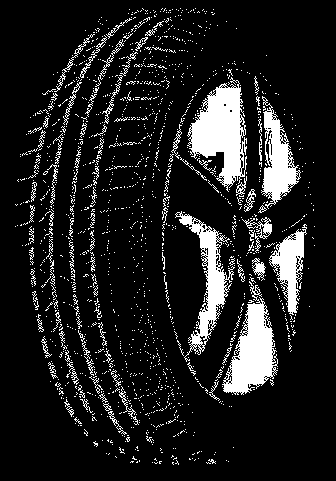

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh_1 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV)

cv2_imshow(thresh_1)

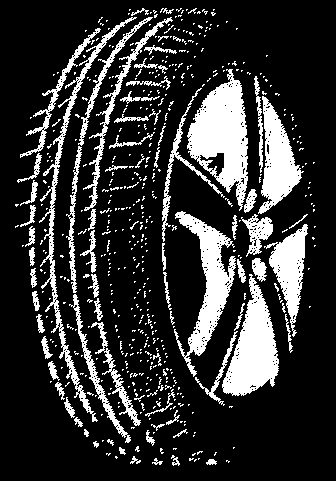

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
cv2_imshow(cv2.dilate(thresh_1, kernel))

In [ ]:
def show_histogram(image):
  ax = plt.subplot(3, 3, 1)

  for i, col in enumerate(['b', 'g', 'r']):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    ax = plt.subplot(3, 1, i + 1, sharey=ax)
    plt.plot(hist, color=col)
  plt.show()

def show_histogram_equalized(image):
  new_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  H, S, V = cv2.split(new_image)
  eq_V = cv2.equalizeHist(V)
  eq_image = cv2.cvtColor(cv2.merge([H, S, eq_V]), cv2.COLOR_HSV2BGR)
  show_histogram(image)
  show_histogram(eq_image)
  cv2_imshow(image)
  cv2_imshow(eq_image)
  return eq_image

def generate_equalized_image(image):
  new_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  H, S, V = cv2.split(new_image)
  eq_V = cv2.equalizeHist(V)
  eq_image = cv2.cvtColor(cv2.merge([H, S, eq_V]), cv2.COLOR_HSV2BGR)
  return eq_image

<ipython-input-13-b76af94d711c>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3, 1, i + 1, sharey=ax)


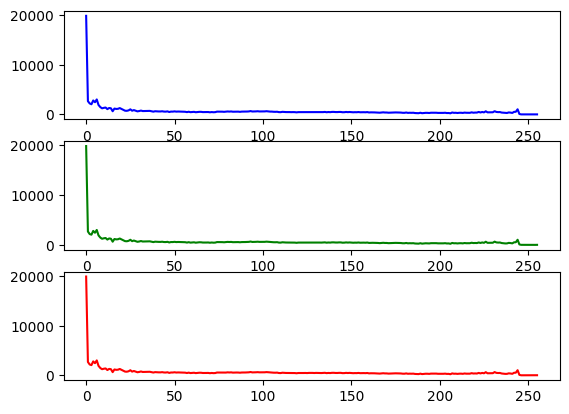

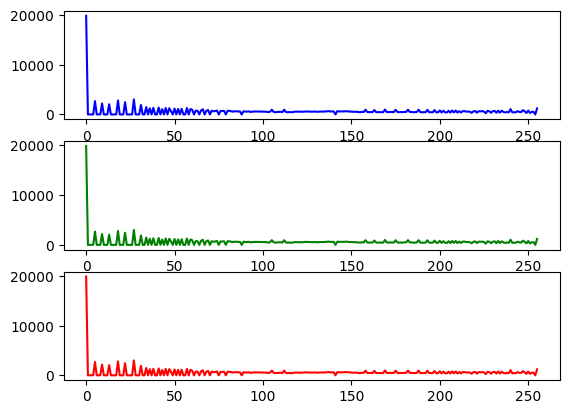

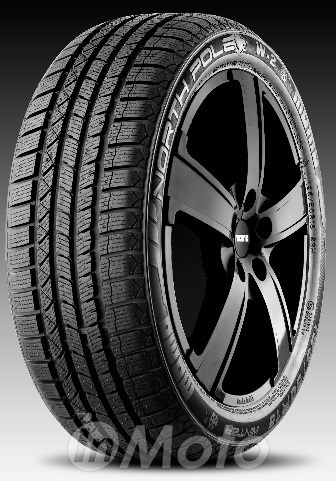

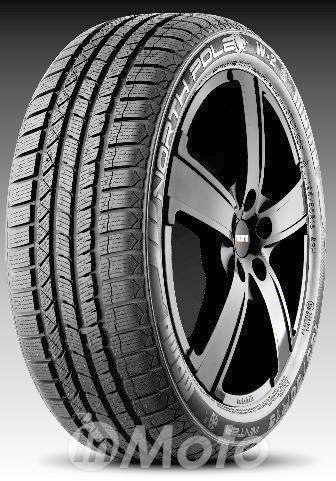

In [ ]:
equalized_img = show_histogram_equalized(img)

In [ ]:
def threshold(image, x):
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  _, thresh = cv2.threshold(gray_image, x, 255, cv2.THRESH_BINARY)
  return thresh

def threshold_widget(image):
  @interact(x=widgets.IntSlider(min=0, max=255, step=1, value=100))
  def trackbar(x):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray_image, x, 255, cv2.THRESH_BINARY)
    cv2_imshow(thresh)

In [ ]:
threshold_widget(equalized_img)

interactive(children=(IntSlider(value=100, description='x', max=255), Output()), _dom_classes=('widget-interac…

In [ ]:
threshold_widget(img)

interactive(children=(IntSlider(value=100, description='x', max=255), Output()), _dom_classes=('widget-interac…

In [ ]:
def adaptive_threshold(image, method, x):
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  if method == 'mean':
    adaptive_method = cv2.ADAPTIVE_THRESH_MEAN_C
  elif method == 'gaussian':
    adaptive_method = cv2.ADAPTIVE_THRESH_GAUSSIAN_C
  else:
    raise ValueError("Input must be 'hello' or 'world'")
  thresh = cv2.adaptiveThreshold(gray_image,
                                   255,
                                   adaptive_method,
                                   cv2.THRESH_BINARY,
                                   x,
                                   2)
  return thresh

def adaptive_threshold_widget(image, method):
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  if method == 'mean':
    adaptive_method = cv2.ADAPTIVE_THRESH_MEAN_C
  elif method == 'gaussian':
    adaptive_method = cv2.ADAPTIVE_THRESH_GAUSSIAN_C
  else:
    raise ValueError("Input must be 'hello' or 'world'")
  @interact(x=widgets.IntSlider(min=3, max=15, step=2, value=9))
  def trackbar(x):    
    thresh = cv2.adaptiveThreshold(gray_image,
                                   255,
                                   adaptive_method,
                                   cv2.THRESH_BINARY,
                                   x,
                                   2)
    cv2_imshow(thresh)



In [ ]:
adaptive_threshold_widget(equalized_img, 'gaussian')

interactive(children=(IntSlider(value=9, description='x', max=15, min=3, step=2), Output()), _dom_classes=('wi…

In [ ]:
adaptive_threshold_widget(img, 'gaussian')

interactive(children=(IntSlider(value=9, description='x', max=15, min=3, step=2), Output()), _dom_classes=('wi…

In [ ]:
edited_mean = adaptive_threshold(equalized_img, 'mean', 7)
img_mean = adaptive_threshold(img, 'mean', 7)
edited_gaussian = adaptive_threshold(equalized_img, 'gaussian', 7)
img_gaussian = adaptive_threshold(img, 'gaussian', 7)

In [ ]:
def apply_filter(source, kernel):
  new_image = cv2.filter2D(source, -1, kernel)
  cv2_imshow(new_image)
  return new_image

In [ ]:
upper_kernel = np.array([ [1, 2, 1],
                                [0, 0, 0],
                                [-1, -2, -1]])

right_kernel = np.array([ [-1, 0, 1],
                                [-2, 0, 2],
                                [-1, 0, 1]])

### Sobel img

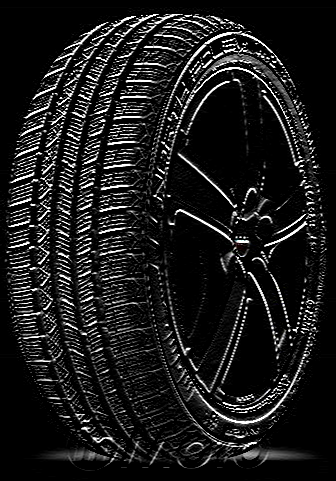

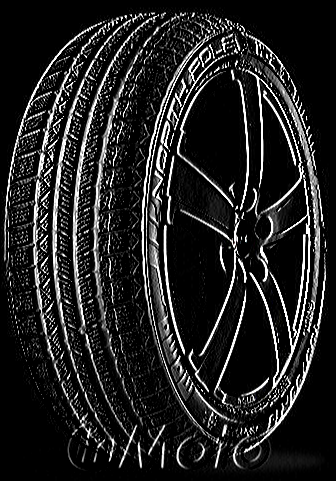

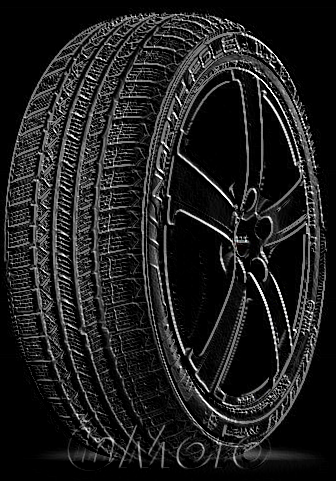

In [ ]:
img_upper_sobel = apply_filter(img, upper_kernel)
img_right_sobel = apply_filter(img, right_kernel)
sobel_img = img_upper_sobel/2 + img_right_sobel/2
cv2_imshow(sobel_img)

### Sobel equalized_img

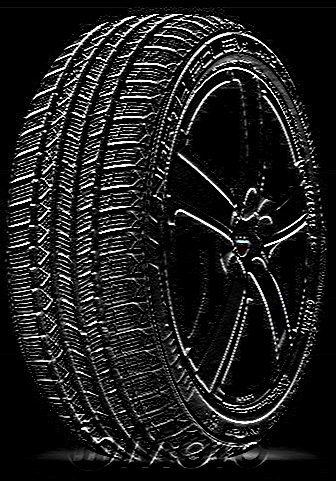

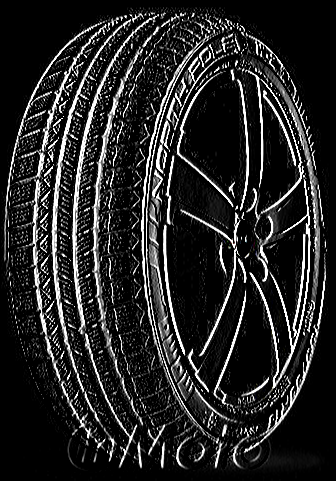

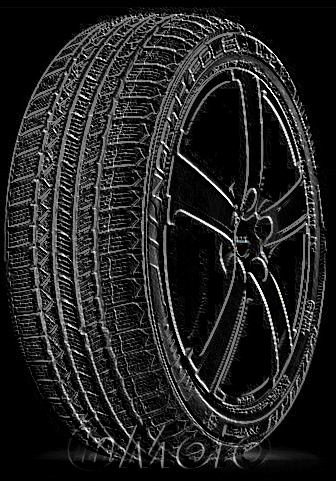

In [ ]:
equalized_img_upper_sobel = apply_filter(equalized_img, upper_kernel)
equalized_img_right_sobel = apply_filter(equalized_img, right_kernel)
sobel_equalized_img = equalized_img_upper_sobel/2 + equalized_img_right_sobel/2
cv2_imshow(sobel_equalized_img)

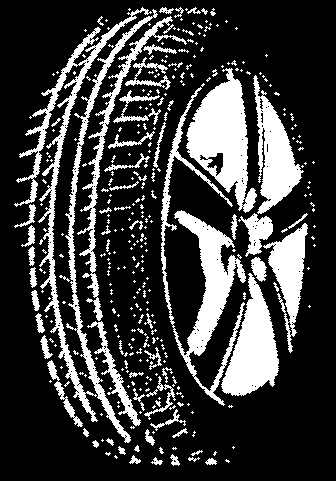

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
cv2_imshow(cv2.dilate(thresh_1, kernel))

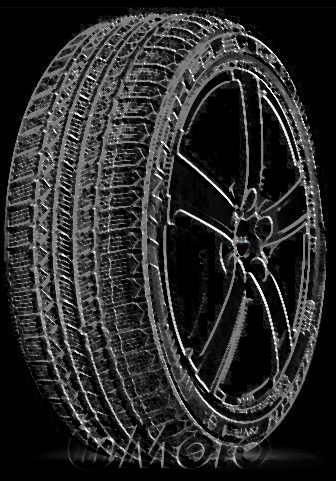

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
cv2_imshow(cv2.morphologyEx(sobel_equalized_img, cv2.MORPH_CLOSE, kernel))

#Model

## Equalized histogram

In [ ]:
for sub_type in ['1', '2', '3']:
  image_folder = f'data/train_equalized_histogram/{sub_type}'
  save_folder = f'data/train_equalized_histogram/{sub_type}'
  for filename in os.listdir(save_folder):
    image = cv2.imread(os.path.join(image_folder, filename))
    eq_image = generate_equalized_image(image)
    cv2.imwrite(f'{save_folder}/{filename}', eq_image)

In [ ]:
test_size = 0.2
path = 'data'

for sub_type in ['1', '2', '3']:
  os.makedirs(path + '/test_equalized_histogram' +f'/{sub_type}', exist_ok=True)
  file_list = os.listdir(path + '/train_equalized_histogram/' + sub_type)
  number_of_samples = int(len(file_list) * test_size)

  for file_name in random.sample(file_list, number_of_samples):
    os.rename(path +'/train_equalized_histogram/' + sub_type + '/' + file_name,
              path +'/test_equalized_histogram/' + sub_type + '/' + file_name)

train_path = 'data/train_equalized_histogram'
test_path = 'data/test_equalized_histogram'
print(len(os.listdir(train_path + '/1')))
print(len(os.listdir(test_path + '/1')))

603
150


In [ ]:
data_path = 'data/train_equalized_histogram'

batch_size = 512
img_heights = 128
img_width = 128



In [ ]:
train_ds = keras.utils.image_dataset_from_directory(data_path,
                                                    validation_split=0.2,
                                                    subset='training',
                                                    image_size = (img_heights, img_width),
                                                    batch_size = batch_size,
                                                    label_mode='categorical',
                                                    interpolation='bilinear',
                                                    seed=42)

val_ds = keras.utils.image_dataset_from_directory(data_path,
                                                    validation_split=0.2,
                                                    subset='validation',
                                                    image_size = (img_heights, img_width),
                                                    batch_size = batch_size,
                                                    label_mode='categorical',
                                                  interpolation='bilinear',
                                                  seed=42)

Found 16194 files belonging to 3 classes.
Using 12956 files for training.
Found 16194 files belonging to 3 classes.
Using 3238 files for validation.


In [ ]:
model_10 = Sequential()

model_10.add(layers.Rescaling(1/255)) # przez to, z wczytujemy batchami trzeba ustandaryzować używajać warstwy Rescaling
model_10.add(layers.Conv2D(64,
                        (3, 3),
                        padding='same',
                        activation='relu',
                        input_shape=(img_width, img_heights, 3)))

model_10.add(layers.MaxPool2D(2,2))

model_10.add(layers.Conv2D(32,
                        (3, 3),
                        padding='same',
                        activation='relu'
                        ))

model_10.add(layers.MaxPool2D(2,2))

model_10.add(layers.Conv2D(16,
                        (3, 3),
                        padding='same',
                        activation='relu'
                        ))

model_10.add(layers.MaxPool2D(2,2))

model_10.add(layers.Flatten())

model_10.add(layers.Dense(256,
                       activation='relu'))

model_10.add(layers.Dense(128,
                       activation='relu'))

model_10.add(layers.Dense(3,
                       activation='softmax'))

In [ ]:
model_10.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

In [ ]:
history_10 = model_10.fit(train_ds,
                    validation_data=val_ds,
                    epochs=20,
                    batch_size=512)

Epoch 1/20
26/26 [==============================] - 57s 1s/step - loss: 1.0986 - accuracy: 0.4102 - val_loss: 1.0624 - val_accuracy: 0.4194
Epoch 2/20
26/26 [==============================] - 41s 1s/step - loss: 1.0578 - accuracy: 0.4388 - val_loss: 1.0476 - val_accuracy: 0.4595
Epoch 3/20
26/26 [==============================] - 43s 1s/step - loss: 1.0186 - accuracy: 0.4870 - val_loss: 1.0010 - val_accuracy: 0.5306
Epoch 4/20
26/26 [==============================] - 49s 1s/step - loss: 0.9352 - accuracy: 0.5594 - val_loss: 0.8564 - val_accuracy: 0.6149
Epoch 5/20
26/26 [==============================] - 45s 1s/step - loss: 0.9128 - accuracy: 0.5841 - val_loss: 0.8540 - val_accuracy: 0.6050
Epoch 6/20
26/26 [==============================] - 42s 1s/step - loss: 0.7975 - accuracy: 0.6410 - val_loss: 0.7974 - val_accuracy: 0.6371
Epoch 7/20
26/26 [==============================] - 41s 1s/step - loss: 0.7433 - accuracy: 0.6659 - val_loss: 0.7830 - val_accuracy: 0.6377
Epoch 8/20
26/26 [==